In [6]:
import sys
sys.path.append('../../')
from src.util.config import Config

**Setting**
create specific Single Item Auction setting

In [20]:
# parameter mechanism
bidder = ['1', '2']
o_space = {i:[1.0, 1.0] for i in bidder}
a_space = {i:[0.0, 1.0] for i in bidder}

param_prior = {"distribution": "uniform"}
param_util = {
    "tie_breaking": "lose", 
    "payment_rule": "first_price",
    "items": [1.0, 0.5],
} 

# parameter approximation game
n = 1
m = 64

config = Config()
config.create_config_game("generalized_auction", bidder, o_space, a_space, param_prior, param_util, n, m)
game = config.create_game()
if not game.mechanism.own_gradient:
    print('utilities computed')
    game.get_utility()

**Learner**
Specify Learning Algorithm

In [21]:
# parameter learner
max_iter = int(5e3)
tol = 1e-5
stop_criterion = 'util_loss'
param_learner = {
    "regularizer": "entropic",
    "eta": 10,
    "beta": 0.05,
    "steprule_bool": True,
}

config.create_config_learner("soda", max_iter, tol, stop_criterion, param_learner)
learner = config.create_learner()

Run Learning Algorithm

In [22]:
#create and initialize strategies
strategies = config.create_strategies(game, "random")

# run learn algorithm
learner.run(game, strategies, disable_tqdm_bool=False, print_result_bool=True, save_history_bool=True)

 93%|██████████████████▌ | 4.64k/5.00k [00:01<00:00, 2.50kit/s]

Convergence after 4642 iterations
Value of stopping criterion (util_loss) 1e-05


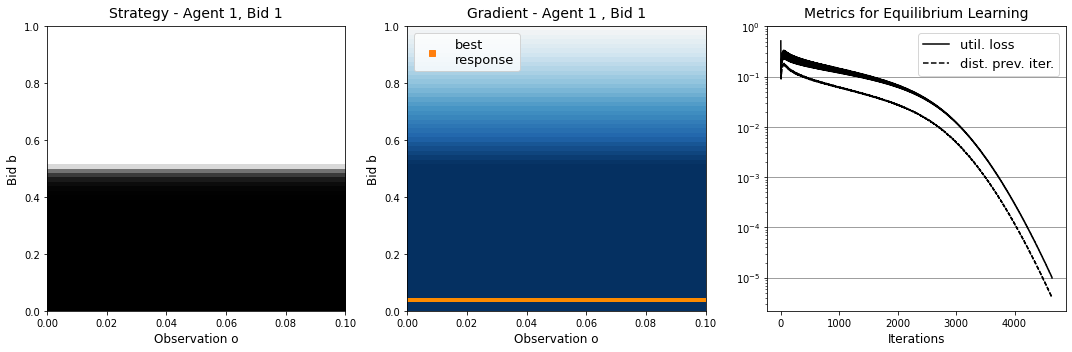

In [23]:
s = strategies['1']
bne = game.mechanism.get_bne('1', s.o_discr)
s.plot(grad=True, metrics=True, beta=bne)

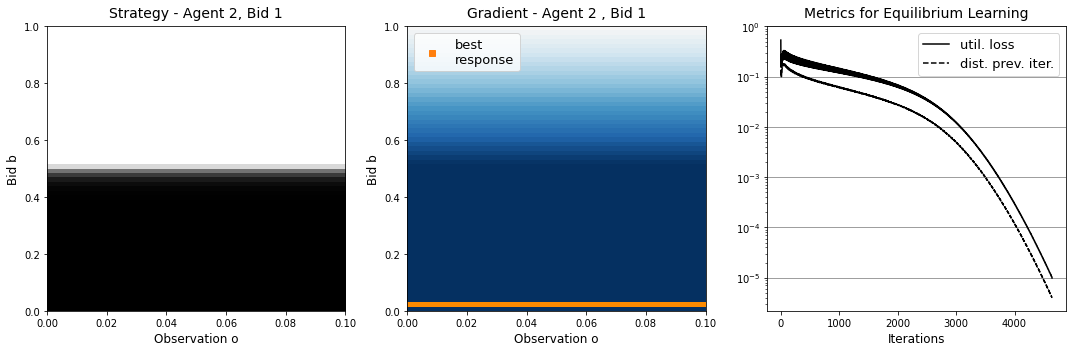

In [24]:
s = strategies['2']
bne = game.mechanism.get_bne('1', s.o_discr)
s.plot(grad=True, metrics=True, beta=bne)

In [26]:
s.x

array([[3.17460008e-002, 3.17456369e-002, 3.17452877e-002,
        3.17449671e-002, 3.17446879e-002, 3.17444613e-002,
        3.17442964e-002, 3.17441998e-002, 3.17441754e-002,
        3.17442239e-002, 3.17443429e-002, 3.17445263e-002,
        3.17447640e-002, 3.17450405e-002, 3.17453328e-002,
        3.17456047e-002, 3.17457966e-002, 3.17458029e-002,
        3.17454270e-002, 3.17442917e-002, 3.17416577e-002,
        3.17360606e-002, 3.17245850e-002, 3.17014115e-002,
        3.16549103e-002, 3.15618285e-002, 3.13756640e-002,
        3.10034143e-002, 3.02590744e-002, 2.87706338e-002,
        2.57940736e-002, 1.98413637e-002, 7.93645604e-003,
        6.00614590e-114, 1.48219694e-323, 4.94065646e-324,
        4.94065646e-324, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+00